# Labs Access Analysis: 03 Map Plot

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import json
pd.options.mode.chained_assignment = None
import branca.colormap as cmp
import os
import time
import folium

sns.set()
#sns.set_style("whitegrid") # Seaborn style

In [2]:
# Load data, json
with open('data/isochrones.json') as json_file:
    data = json.load(json_file)

In [3]:
# Load data, csv
labs = pd.read_csv('data/labs.csv')

In [4]:
locations = {}
for i in data:
  locations[i['name']] = i['metadata']['query']['locations'][0]

## Map Visualization

In [5]:
m=folium.Map(location=[41.396721,2.1943200000000003])
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)

In [6]:
for loc in locations:
  folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(m)

In [7]:
m

In [8]:
rows = []
for h in data:
  rows.append([h["name"], h["features"][0]["properties"]["total_pop"], h["features"][0]["properties"]["area"], h["features"][0]["properties"]["reachfactor"], h["features"][0]["geometry"]["coordinates"], []])

In [9]:
map_data = pd.DataFrame(rows, columns=['Name', 'total_pop', 'area', 'reachfactor','geometry', 'isochrone'])
map_data.head()

,Name,total_pop,area,reachfactor,geometry,isochrone
0,Fab Lab Barcelona,10677.0,406405.17,0.7451,"[[[2.190392, 41.397674], [2.190397, 41.397253]...",[]
1,MADE Makerspace Barcelona,9361.0,377518.44,0.6922,"[[[2.137153, 41.372965], [2.137421, 41.371969]...",[]
2,Soko Tech,8024.0,337943.24,0.6196,"[[[2.185319, 41.425635], [2.185335, 41.425275]...",[]
3,LSCongres,9361.0,376317.53,0.6900,"[[[2.177889, 41.425641], [2.177892, 41.425281]...",[]
4,Green Fab Lab,0.0,30403.49,0.0557,"[[[2.133455, 41.449843], [2.13456, 41.448051],...",[]


In [10]:
# Create a flip isochrone cell for each lab
for ind in map_data.index:
     row_iso = []
     for coords in map_data['geometry'][ind][0]:
       row_iso.append([coords[1], coords[0], 900])
     map_data.at[ind, 'isochrone'] = row_iso

In [11]:
map_data.set_index('Name', inplace=True)
labs.set_index('Name', inplace=True)

In [12]:
# Add columns from the .csv to the .json
full_map_data = map_data.join(labs)

In [13]:
full_map_data

,total_pop,area,reachfactor,geometry,isochrone,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes
Name,,,,,,,,,,,,,,,
Fab Lab Barcelona,10677.0,406405.17,0.7451,"[[[2.190392, 41.397674], [2.190397, 41.397253]...","[[41.397674, 2.190392, 900], [41.397253, 2.190...",Fab Lab,Barcelona,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN
MADE Makerspace Barcelona,9361.0,377518.44,0.6922,"[[[2.137153, 41.372965], [2.137421, 41.371969]...","[[41.372965, 2.137153, 900], [41.371969, 2.137...",Fab Lab,Barcelona,BCN,Carrer Noguera Pallaresa 59-61,8014.0,41.373238,2.141084,"Fablabs.io, Hackerspaces.org, Makerspaces.make.co",NaN,NaN
Soko Tech,8024.0,337943.24,0.6196,"[[[2.185319, 41.425635], [2.185335, 41.425275]...","[[41.425635, 2.185319, 900], [41.425275, 2.185...",Fab Lab,Barcelona,BCN,"Carrer de Vallès i Ribot, 36",8027.0,41.424535,2.188883,Fablabs.io,https://soko.tech/,NaN
LSCongres,9361.0,376317.53,0.6900,"[[[2.177889, 41.425641], [2.177892, 41.425281]...","[[41.425641, 2.177889, 900], [41.425281, 2.177...",Fab Lab,Barcelona,BCN,"Carrer del Cardenal Tedeschini, 50",8027.0,41.426002,2.182026,Fablabs.io,https://fablabs.io/labs/lscongres,NaN
Green Fab Lab,0.0,30403.49,0.0557,"[[[2.133455, 41.449843], [2.13456, 41.448051],...","[[41.449843, 2.133455, 900], [41.448051, 2.134...",Fab Lab,Cerdanyola del Vallès,BCN,"Ctra. BV-1415 (Horta-Cerdanyola), km 7",8290.0,41.450394,2.133441,Fablabs.io,NaN,NaN
Barcelona Mobility LAB,0.0,24576.96,0.0451,"[[[2.197291, 41.432707], [2.19743, 41.432593],...","[[41.432707, 2.197291, 900], [41.432593, 2.197...",Fab Lab,Barcelona,BCN,Passatge del Torrent de l'Estadella 56,8030.0,41.432152,2.199793,Fablabs.io,NaN,NaN
Fab Lab Sant Cugat,159.0,47177.53,0.0865,"[[[2.090726, 41.465685], [2.090728, 41.465654]...","[[41.465685, 2.090726, 900], [41.465654, 2.090...",Fab Lab,Sant Cugat del Vallès,BCN,"Avinguda de la Torre Blanca, 57",8712.0,41.467569,2.091704,Fablabs.io,NaN,NaN
The FabLab: Make in Milano,3571.0,211451.38,0.3877,"[[[9.201217, 45.44651], [9.20141, 45.4463], [9...","[[45.44651, 9.201217, 900], [45.4463, 9.20141,...",Fab Lab,Milan,MI,"Via Arcivescovo Calabiana, 6",20139.0,45.445866,9.208566,Fablabs.io,NaN,NaN
Vectorealism FabLab,1772.0,300256.23,0.5505,"[[[9.22704, 45.439932], [9.227144, 45.438511],...","[[45.439932, 9.22704, 900], [45.438511, 9.2271...",Service,Milan,MI,"Via Carlo Boncompagni, 57",20139.0,45.438305,9.231811,Fablabs.io,https://fablabs.io/labs/vectorealismfablab,NaN


## Population reached

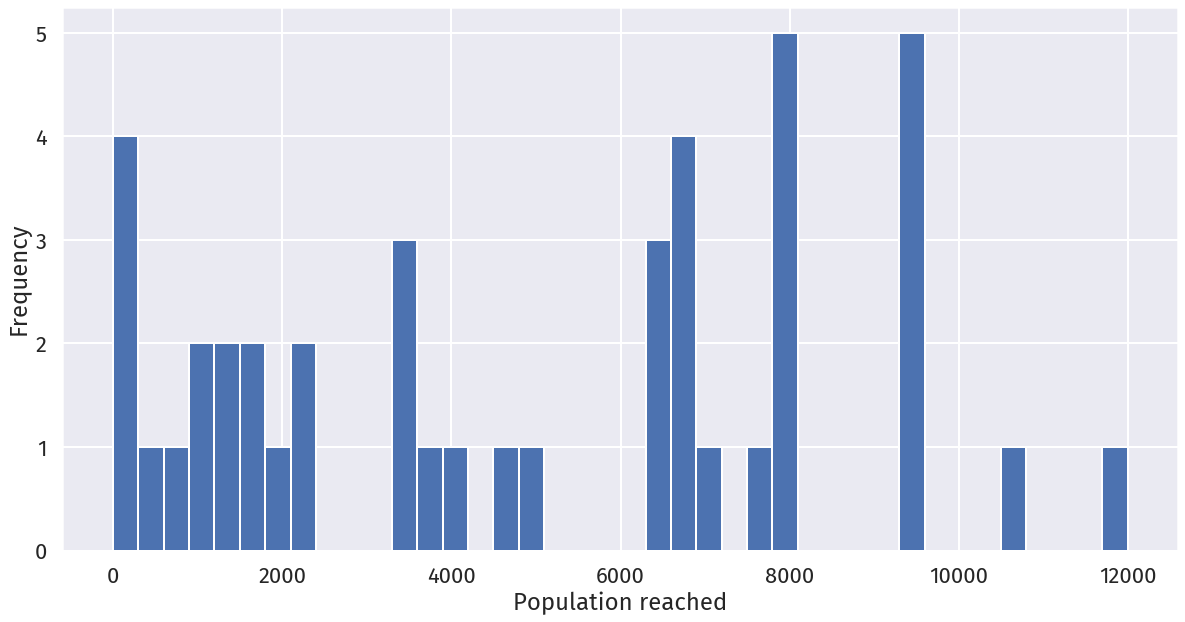

In [14]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
map_data["total_pop"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Population reached')
plt.savefig("svg/labs_population_hist.svg", bbox_inches="tight")
plt.savefig("png/labs_population_hist.png", dpi=300, bbox_inches="tight")

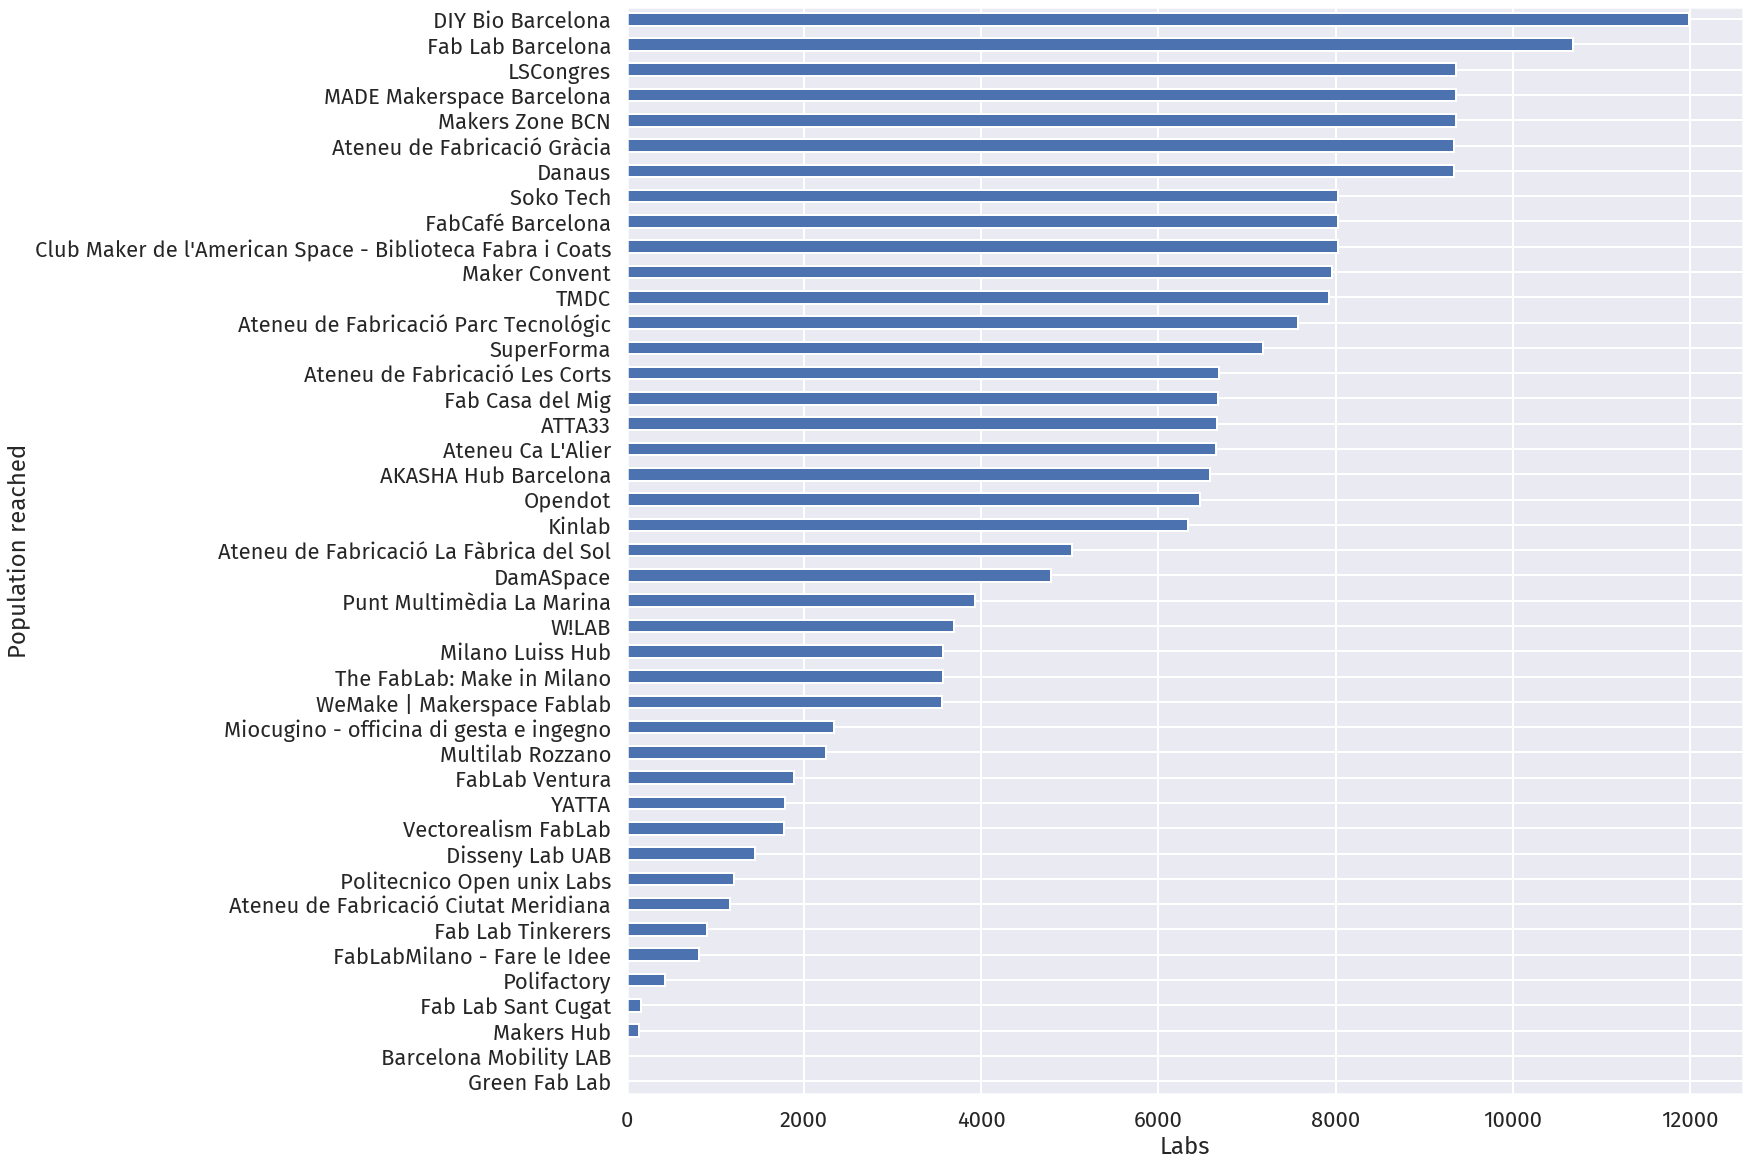

In [15]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind="barh", figsize=(20,20))
plt.ylabel('Population reached')
plt.xlabel('Labs')
plt.savefig("svg/labs_population_bar.svg", bbox_inches="tight")
plt.savefig("png/labs_population_bar.png", dpi=300, bbox_inches="tight")

## Area reached

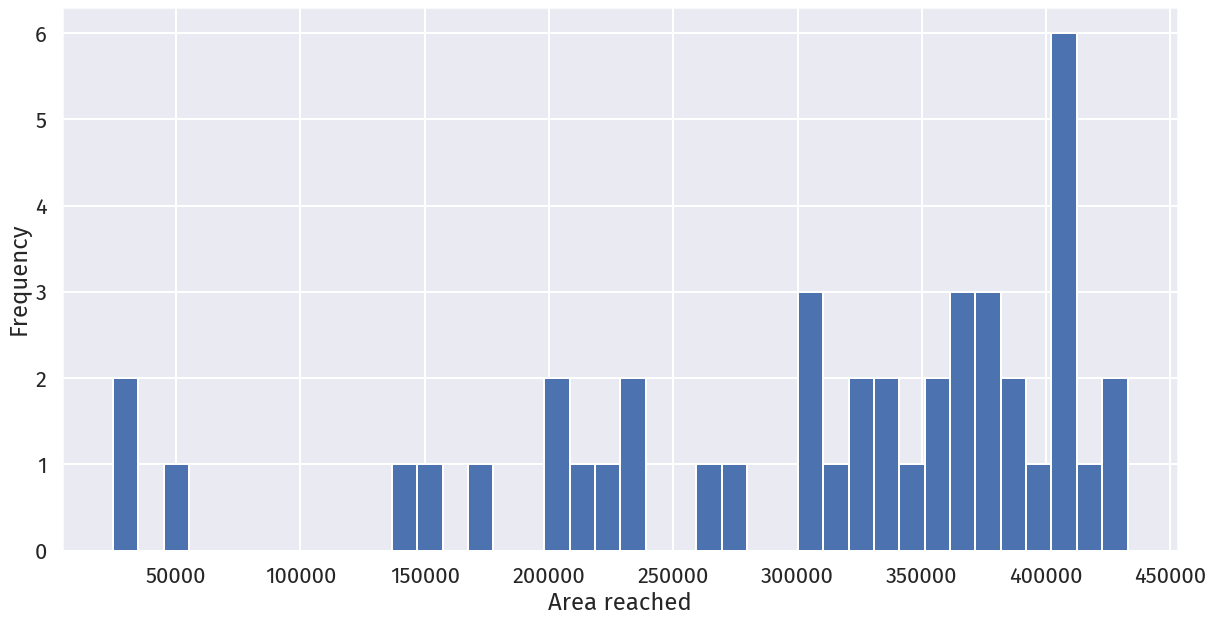

In [16]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
map_data["area"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Area reached')
plt.savefig("svg/labs_area_hist.svg", bbox_inches="tight")
plt.savefig("png/labs_area_hist.png", dpi=300, bbox_inches="tight")

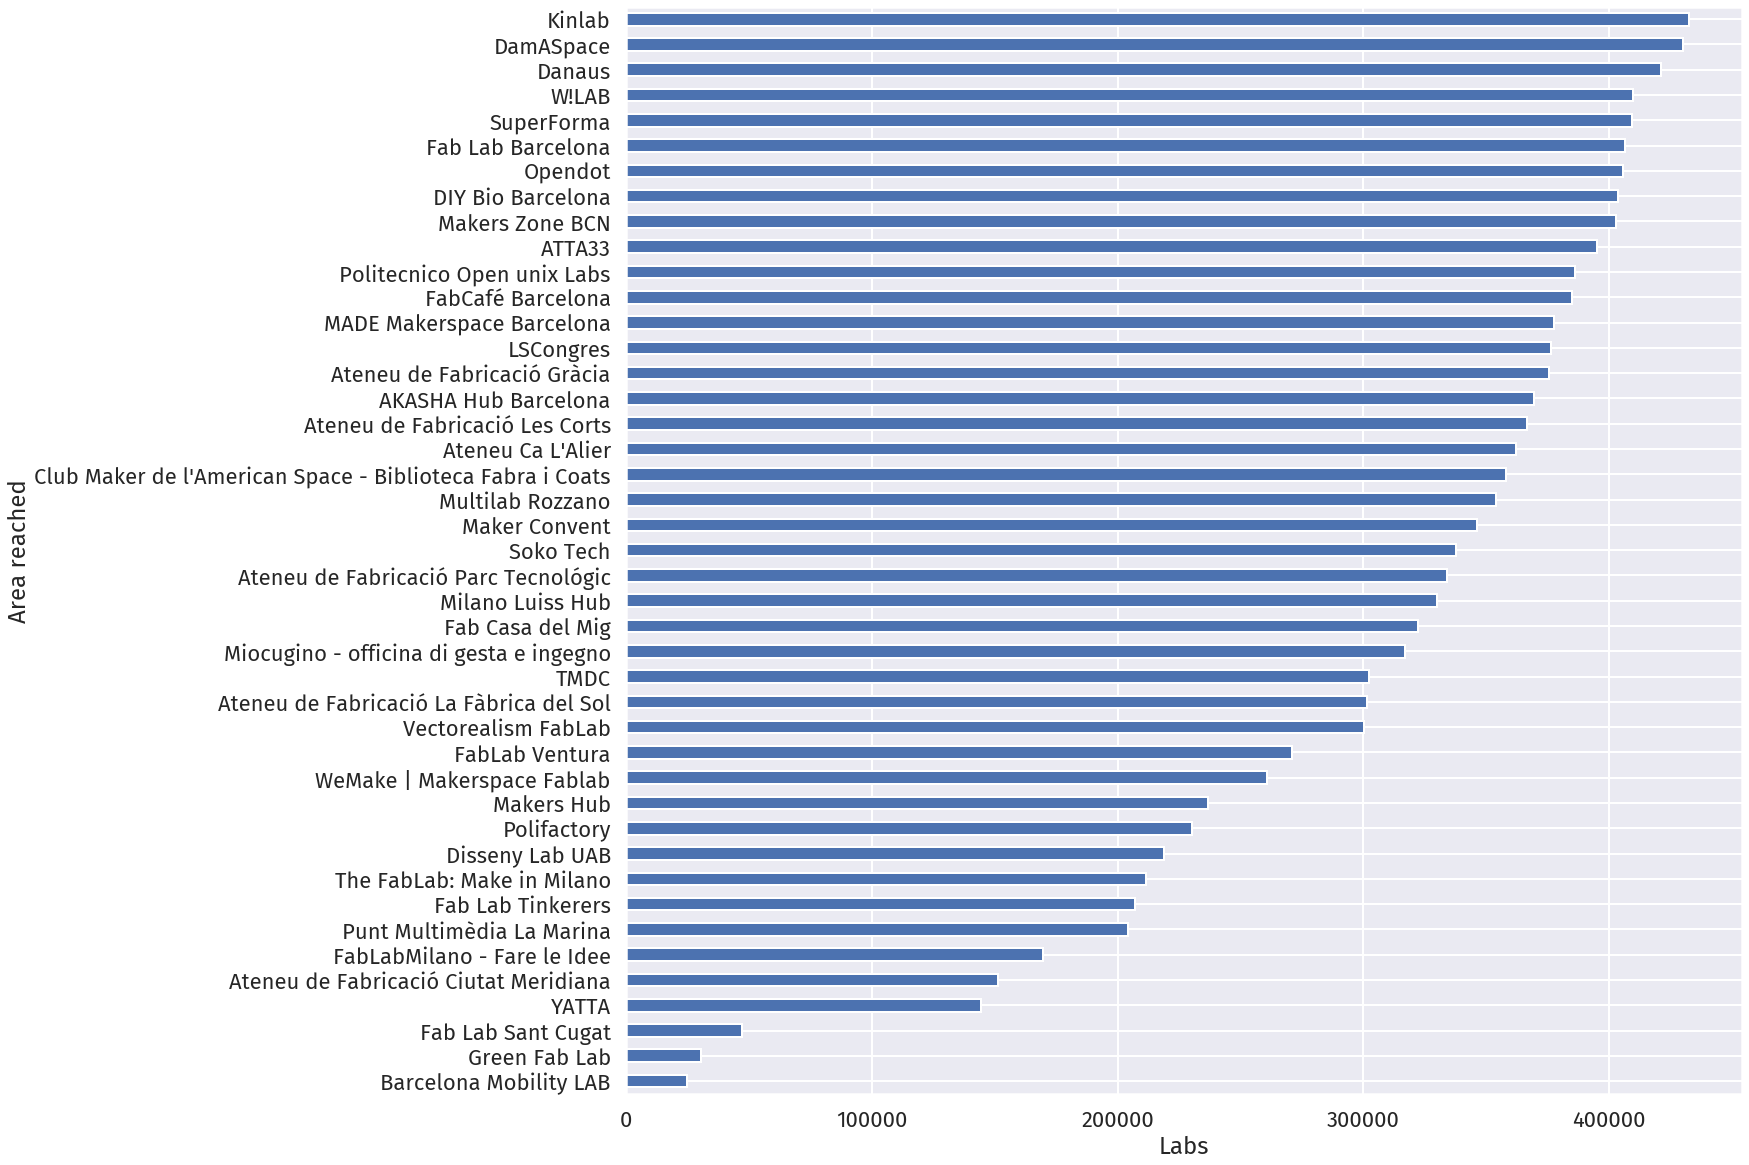

In [17]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
map_data.sort_values(by=['area'])['area'].plot(kind="barh", figsize=(20,20))
plt.ylabel('Area reached')
plt.xlabel('Labs')
plt.savefig("svg/labs_area_bar.svg", bbox_inches="tight")
plt.savefig("png/labs_area_bar.png", dpi=300, bbox_inches="tight")

## Reach Factor

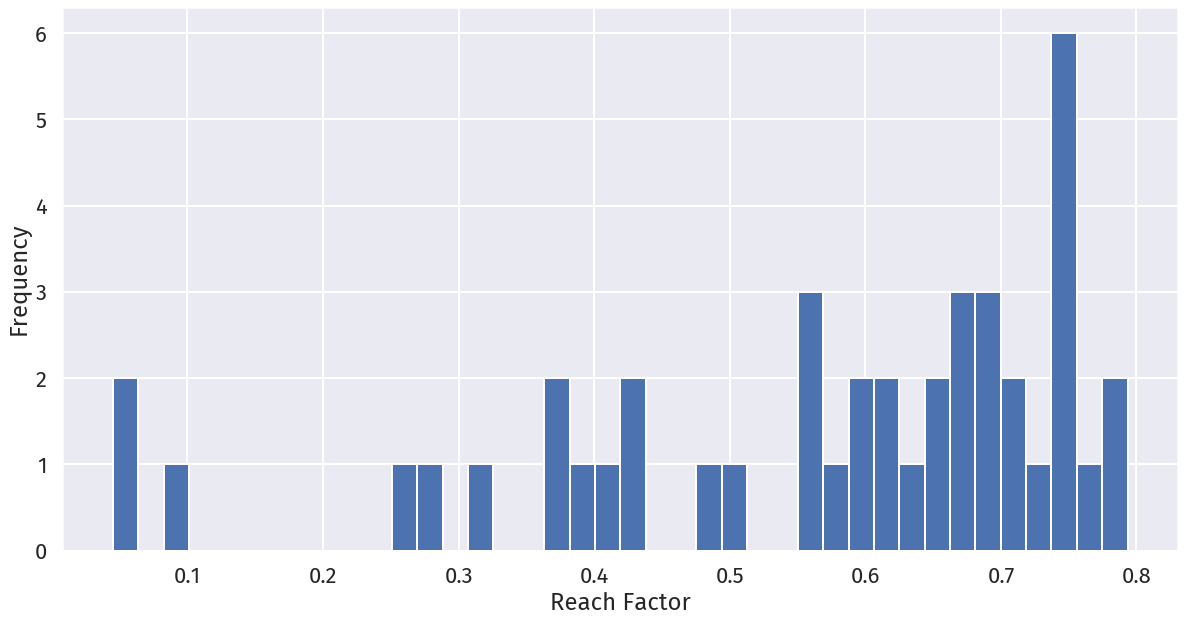

In [18]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
map_data["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Reach Factor')
plt.savefig("svg/labs_reachfactor_hist.svg", bbox_inches="tight")
plt.savefig("png/labs_reachfactor_hist.png", dpi=300, bbox_inches="tight")

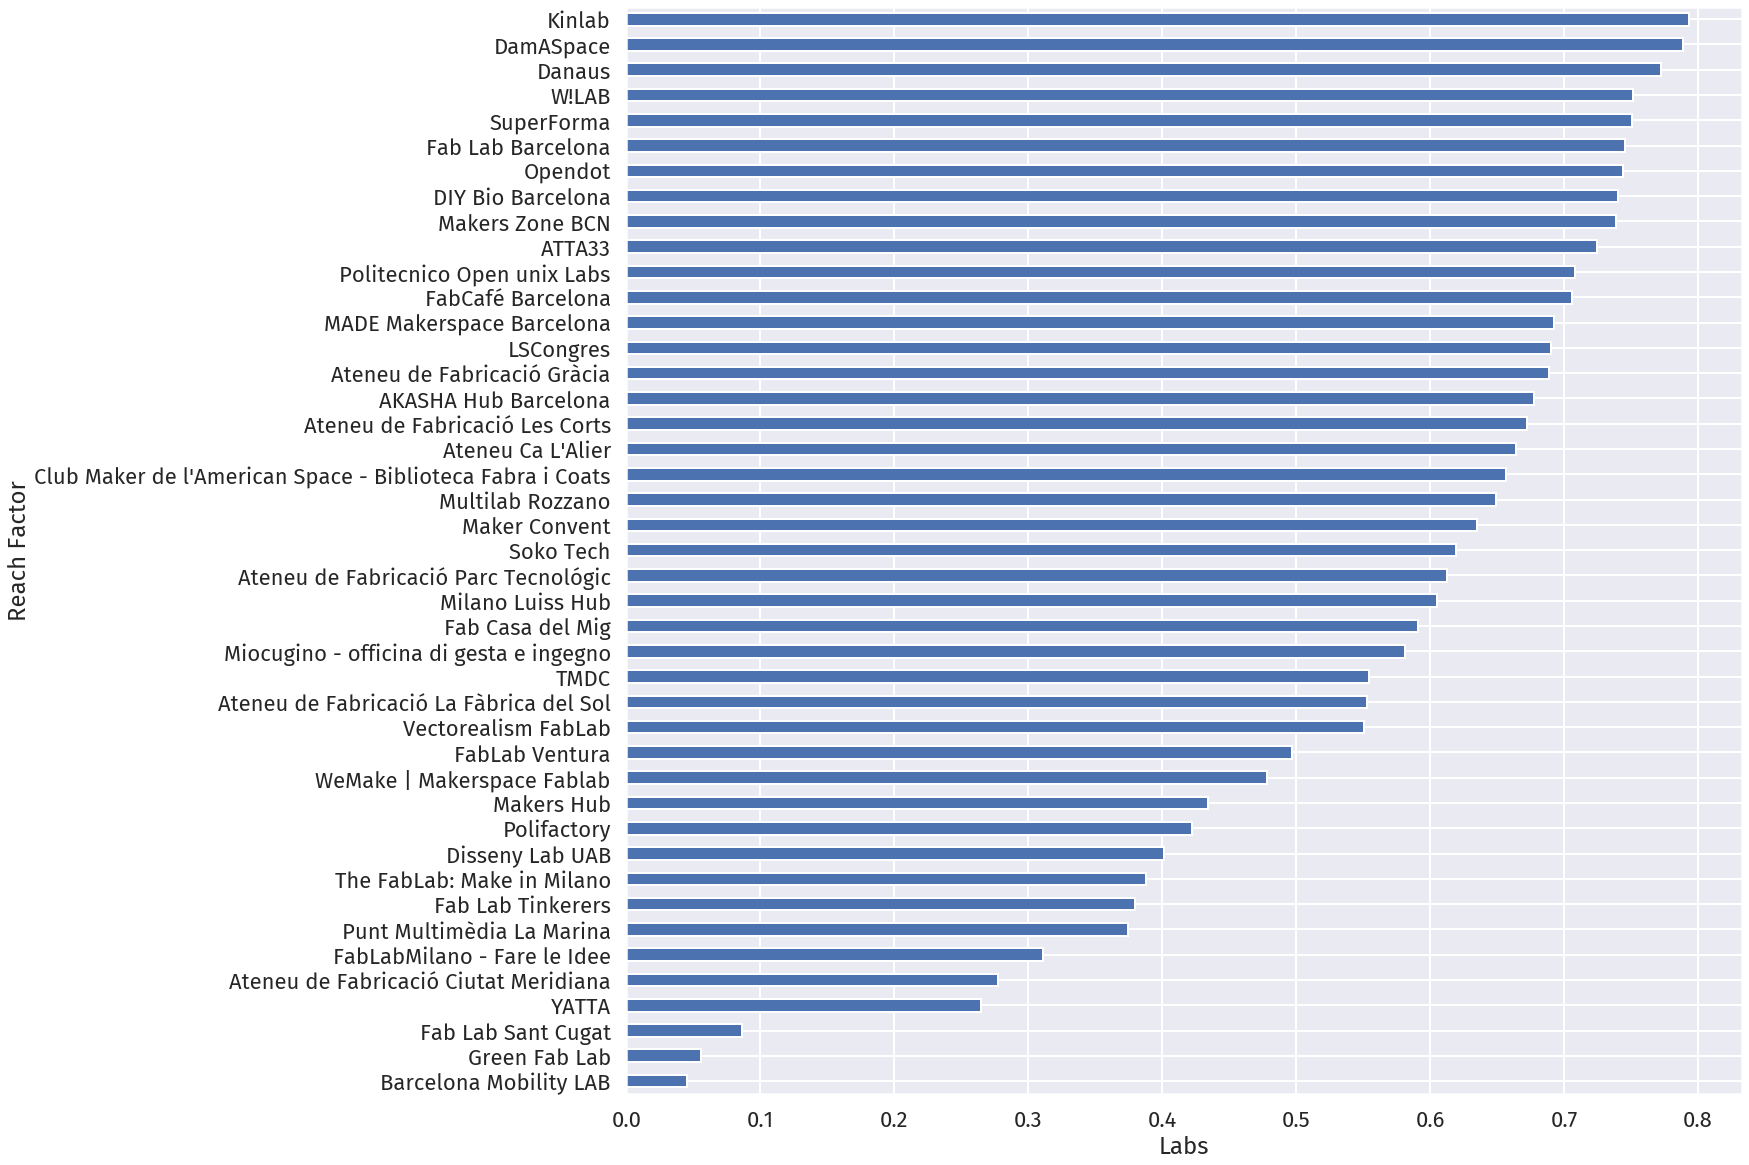

In [19]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind="barh", figsize=(20,20))
plt.ylabel('Reach Factor')
plt.xlabel('Labs')
plt.savefig("svg/labs_reachfactor_bar.svg", bbox_inches="tight")
plt.savefig("png/labs_reachfactor_bar.png", dpi=300, bbox_inches="tight")

## Labs values clustered by city

In [20]:
full_map_data.groupby(["Cluster","Type"]).size()

Cluster  Type                
BCN      Ateneu de Fabricació    6
         City Space              2
         DIYBio Lab              1
         Fab Lab                 9
         FabCafé                 1
         Hackerspace             2
         Library                 1
         Makerspace              4
         Service                 1
MI       DIYBio Lab              1
         Fab Lab                 8
         Hackerspace             1
         Makerspace              4
         Service                 2
dtype: int64

In [21]:
full_map_data.groupby("Cluster")["total_pop"].sum()

Cluster
BCN    166536.0
MI      48118.0
Name: total_pop, dtype: float64

In [22]:
full_map_data.groupby("Cluster")["total_pop"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
BCN,27.0,6168.000,3531.152231,0.0,3812.0,6686.0,8676.5,11990.0
MI,16.0,3007.375,2202.339934,144.0,1631.5,2293.5,3878.0,7183.0


In [23]:
full_map_data.groupby("Cluster")["area"].sum()

Cluster
BCN    8239287.74
MI     4889533.63
Name: area, dtype: float64

In [24]:
full_map_data.groupby("Cluster")["area"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
BCN,27.0,305158.805185,119832.994156,24576.96,260196.1400,357950.640,381335.8150,421077.01
MI,16.0,305595.851875,92764.154865,144295.85,235113.3225,308622.435,390978.7625,432753.51


In [25]:
full_map_data.groupby("Cluster")["reachfactor"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
BCN,27.0,0.559496,0.219713,0.0451,0.477050,0.65630,0.69920,0.7720
MI,16.0,0.560294,0.170071,0.2646,0.431075,0.56585,0.71685,0.7934


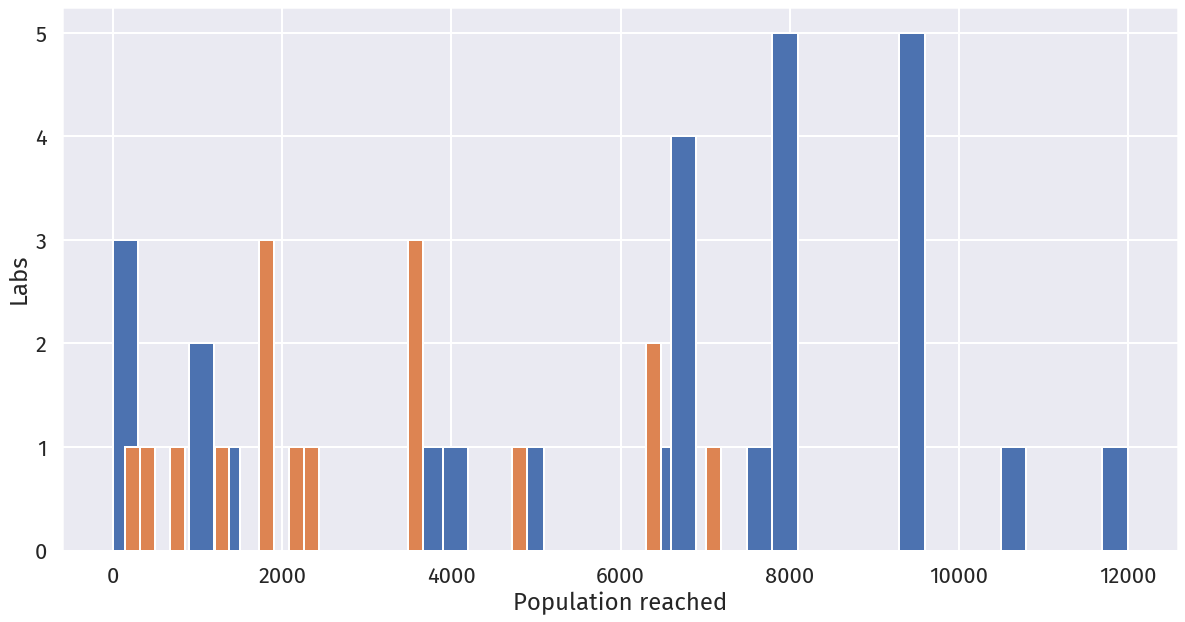

In [26]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
full_map_data.groupby("Cluster")["total_pop"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg/labs_population_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png/labs_population_grouped_hist.png", dpi=300, bbox_inches="tight")

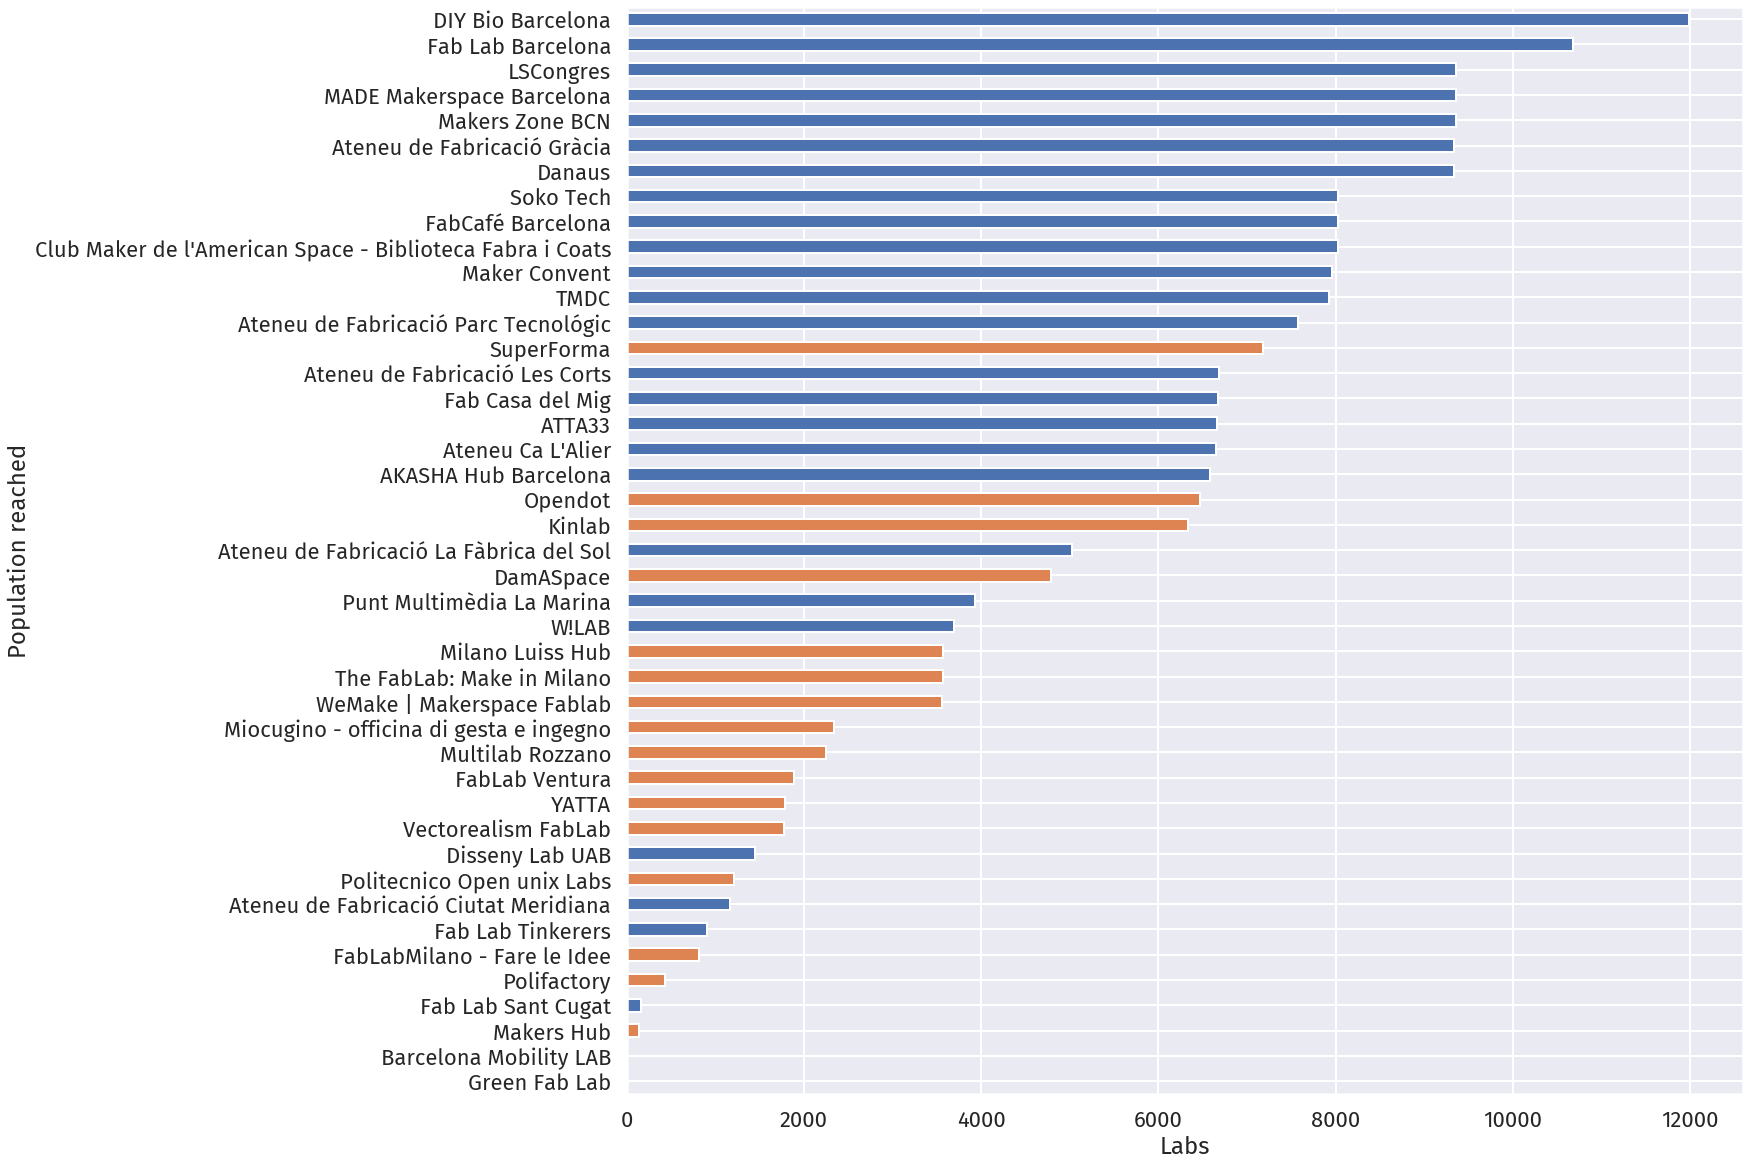

In [27]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
full_map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['total_pop'])['Cluster']], figsize=(20,20))
plt.ylabel('Population reached')
plt.xlabel('Labs')
plt.savefig("svg/labs_population_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png/labs_population_grouped_bar.png", dpi=300, bbox_inches="tight")

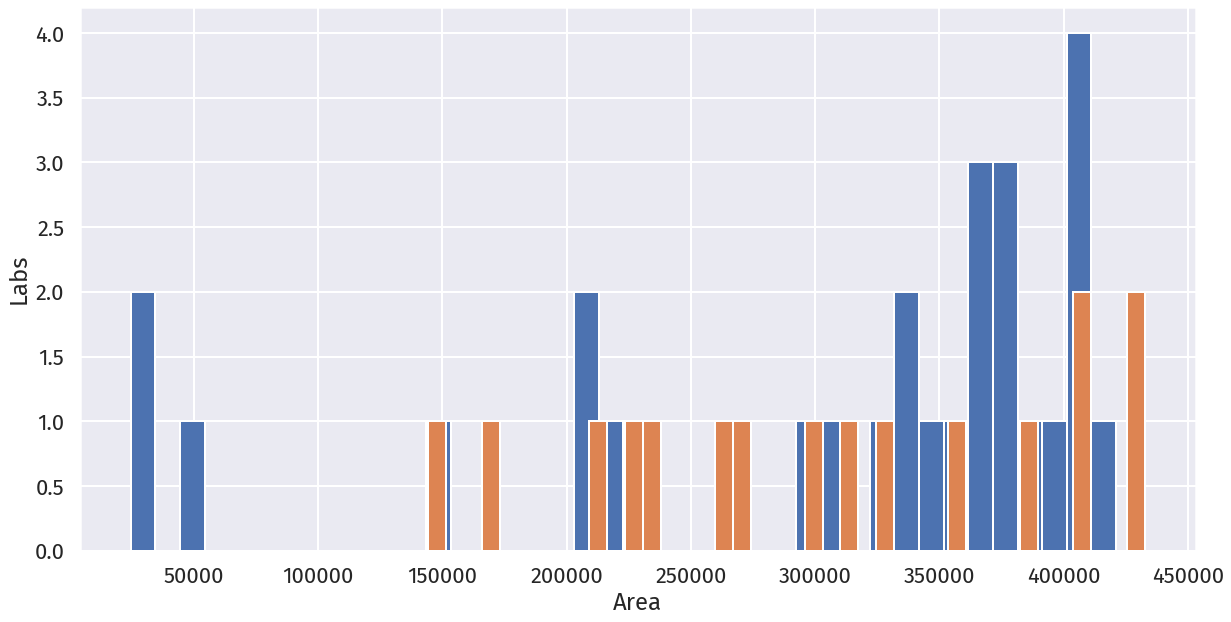

In [28]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
full_map_data.groupby("Cluster")["area"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Area')
plt.ylabel('Labs')
plt.savefig("svg/labs_area_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png/labs_area_grouped_hist.png", dpi=300, bbox_inches="tight")

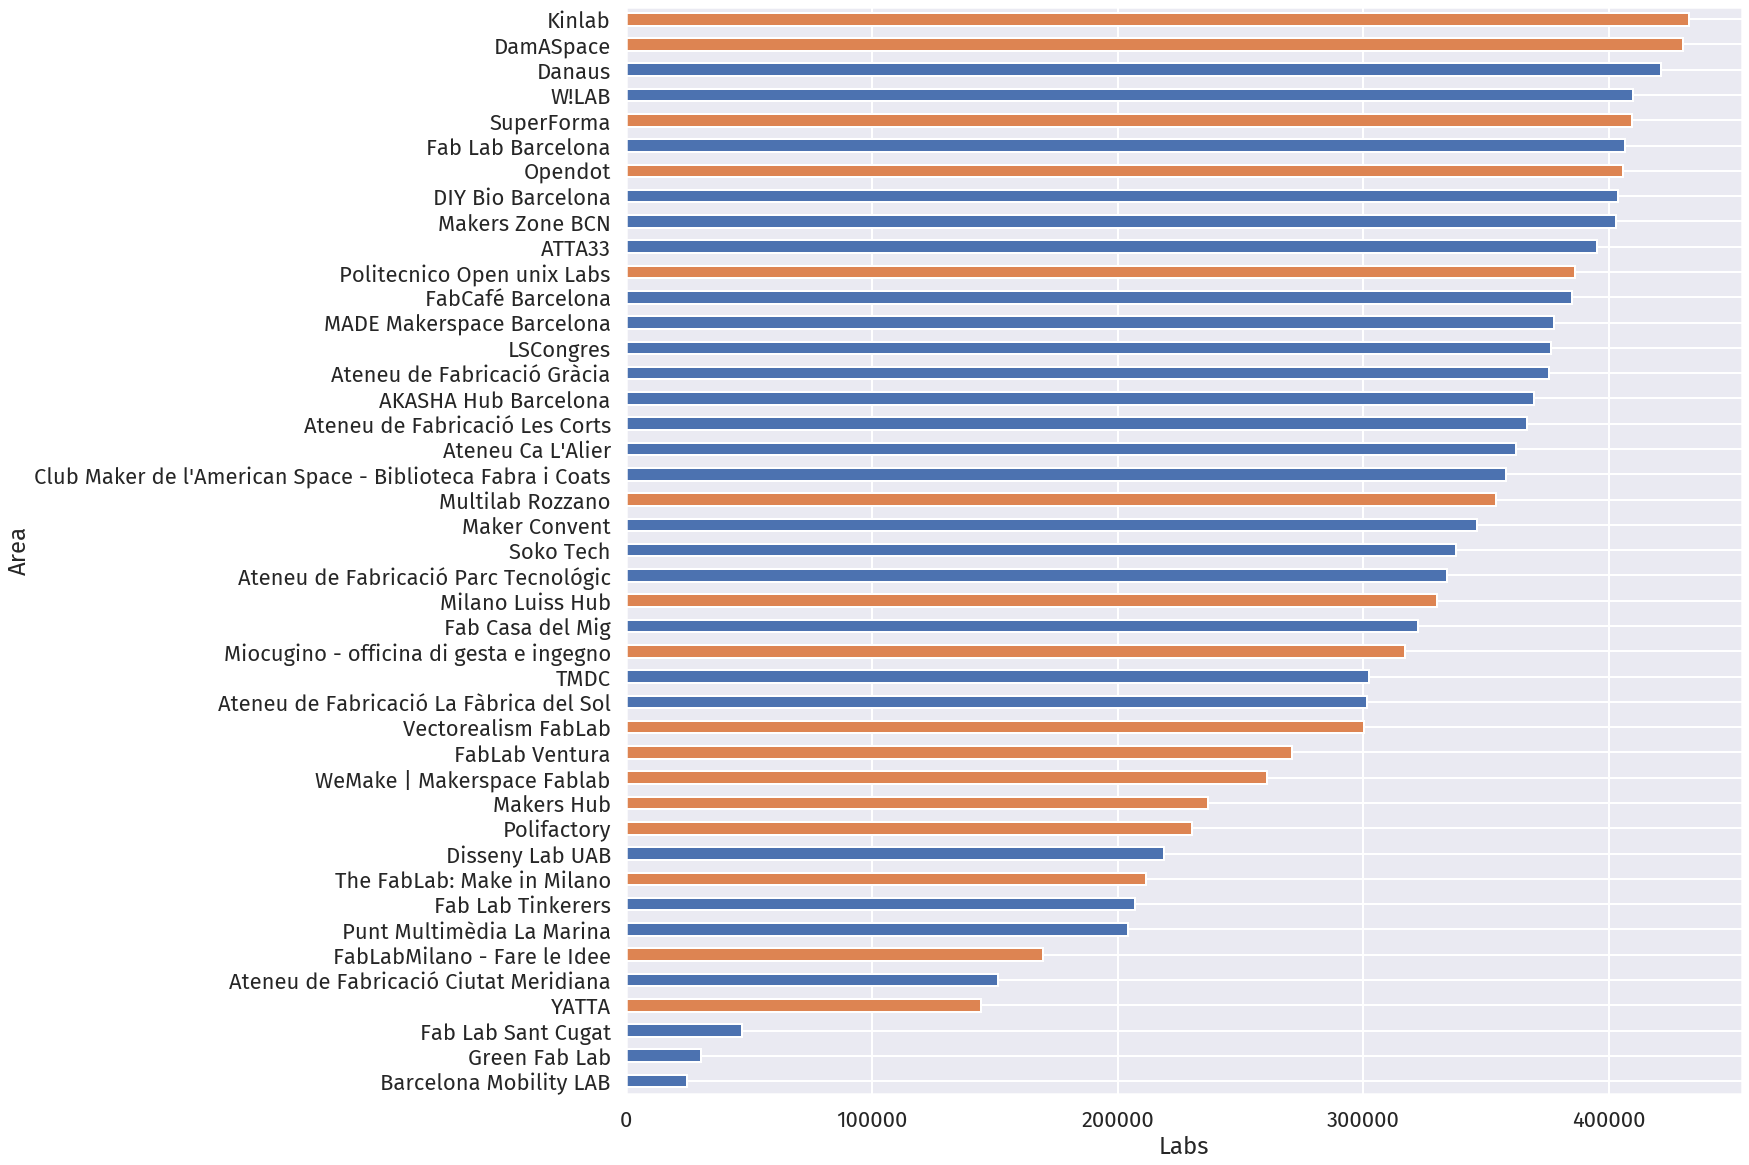

In [29]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
full_map_data.sort_values(by=['area'])['area'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['area'])['Cluster']], figsize=(20,20))
plt.ylabel('Area')
plt.xlabel('Labs')
plt.savefig("svg/labs_area_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png/labs_area_grouped_bar.png", dpi=300, bbox_inches="tight")

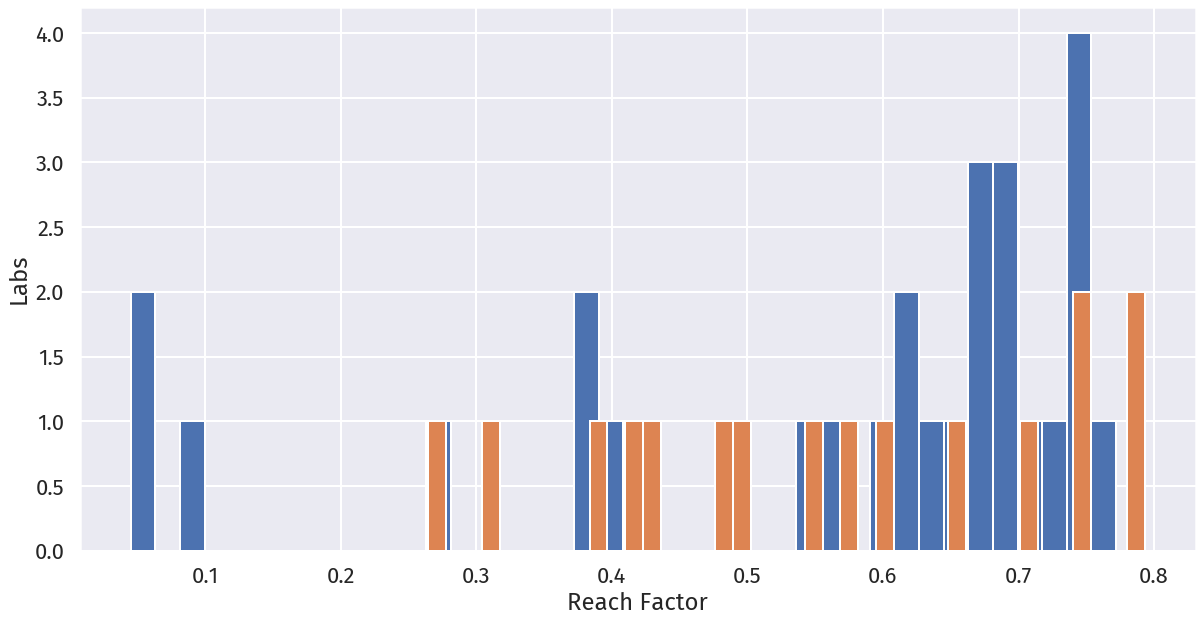

In [30]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
full_map_data.groupby("Cluster")["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg/labs_reachfactor_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png/labs_reachfactor_grouped_hist.png", dpi=300, bbox_inches="tight")

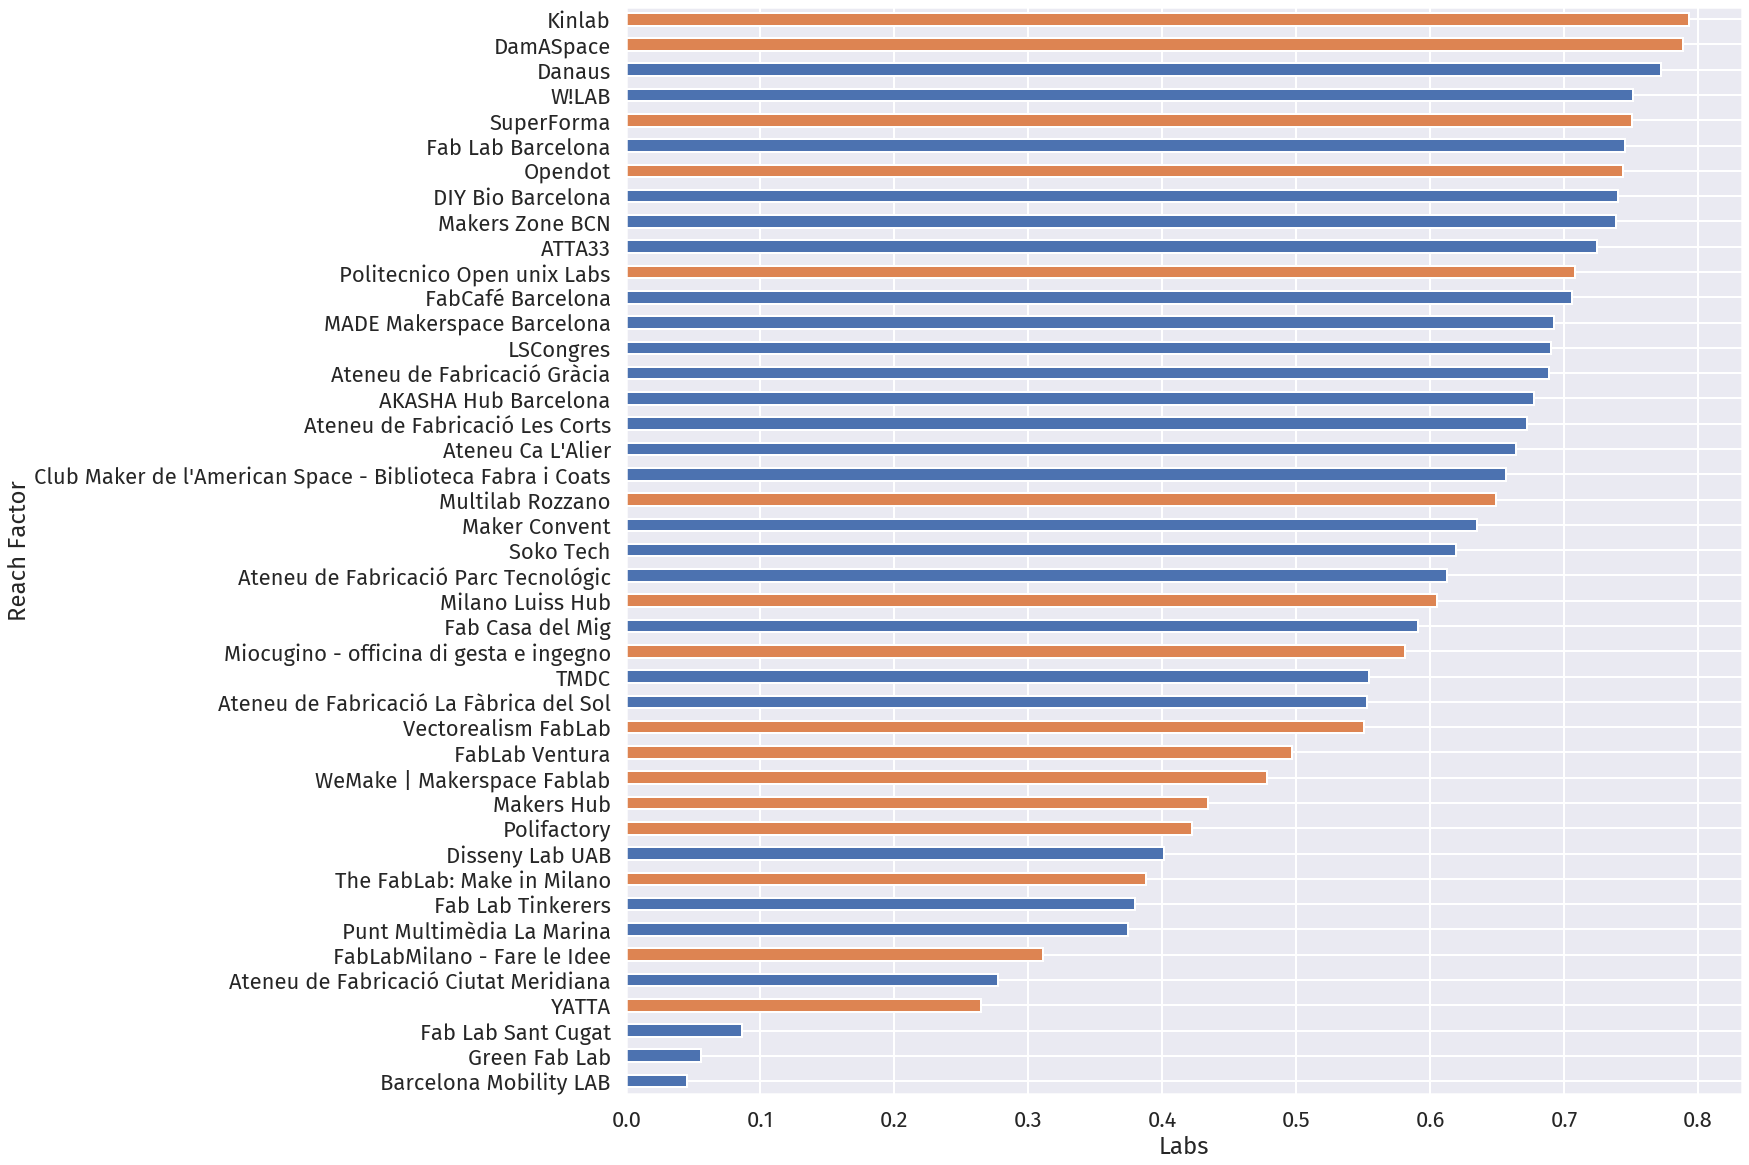

In [31]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("poster")
# Plot the data
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
full_map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['reachfactor'])['Cluster']], figsize=(20,20))
plt.ylabel('Reach Factor')
plt.xlabel('Labs')
plt.savefig("svg/labs_reachfactor_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png/labs_reachfactor_grouped_bar.png", dpi=300, bbox_inches="tight")

## Isochrones

In [32]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [33]:
for iso in data:
  folium.GeoJson(iso, name="geojson").add_to(m)
for loc in locations:
  #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
  folium.Circle(
    radius=30,
    location=[locations[loc][1],locations[loc][0]],
    popup=loc,
    tooltip=loc,
    color="crimson",
    fill="crimson",
).add_to(m)


In [34]:
folium.LayerControl().add_to(m)
m

In [35]:
m.save("html/isochrones.html")

## Isochrones with color from population reached

In [36]:
linear = cmp.LinearColormap(
    ['yellow', 'green', 'blue'],
    vmin=map_data['total_pop'].min(), vmax=map_data['total_pop'].max(),
    caption='Total population'
)
linear

In [37]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [38]:
for iso in data:
  fillColor = map_data.loc[iso["name"]]["total_pop"]
  folium.GeoJson(iso, 
                 name="geojson", 
                 style_function=lambda feature: {
                     "fillColor": linear(feature["properties"]["total_pop"]),
                     "fillOpacity": 0.3,
                     "color": "gray",
                     "weight": 1,
                     "dashArray": ''
                     },
                 ).add_to(m)

for loc in locations:
    #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
    folium.Circle(
        radius=30,
        location=[locations[loc][1],locations[loc][0]],
        popup=loc,
        tooltip=loc,
        fill=True,
        color="crimson",
        fillColor="crimson"
    ).add_to(m)

folium.LayerControl().add_to(m)
m.add_child(linear)

In [39]:
m.save("html/isochrones_popcolor.html")

In [40]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

for iso in data:
  fillColor = map_data.loc[iso["name"]]["total_pop"]
  folium.GeoJson(iso, 
                 name="geojson", 
                 style_function=lambda feature: {
                     "fillColor": linear(feature["properties"]["total_pop"]),
                     "fillOpacity": 0.3,
                     "color": "gray",
                     "weight": 1,
                     "dashArray": ''
                     },
                 ).add_to(m)

for loc in locations:
    #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
    folium.Circle(
        radius=30,
        location=[locations[loc][1],locations[loc][0]],
        popup=loc,
        tooltip=loc,
        fill=True,
        color="crimson",
        fillColor="crimson"
    ).add_to(m)
    folium.map.Marker(
        [locations[loc][1] + 0.0, locations[loc][0] - 0.0],
        icon=folium.features.DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="background-color: rgba(255, 255, 255, 0.5); padding: 5px; font-size: 10px; font-family:'+'Fira Sans;'+'">'+loc+'</div>',
        )
    ).add_to(m)

folium.LayerControl().add_to(m)
m.add_child(linear)

In [41]:
m.save("html/isochrones_popcolor_labels.html")